In this article, we will learn how to binarize an image using NumPy, and of course, we will use OpenCV for reading the image both in grayscale and RGB.

To understand what binary is — binary is something that is made of two things. In computer terminology, binary is just 0 and 1. If we were to relate the same in the images, it is said as black and white images where —

***0*** signifies ***Black***

***1*** signifies ***White***

At the initial stages of learning image processing, we often think of a grayscale image as a binary image. Although it is not. But slowly when we pick up the subject, we realize how wrong we were. So, moving ahead, we will learn how to binarize the image with both using the library and without using the library (NumPy is used for matrix operations just to avoid the slowness of the program when used the regular for loops). Besides this, we will also use Matplotlib to plot the results.

**RGB and Grayscale Overview**

The binary operation works really well for the grayscale images. The problem with the color (RGB) images is that each pixel is a vector representing 3 unique values one for Red, one for Green, and one for Blue.

A typical grayscale image’s matrix would look like

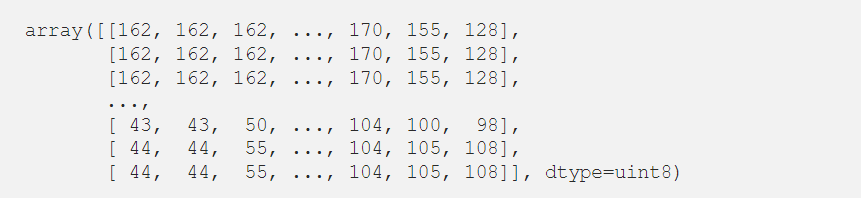


A typical RGB image’s matrix would seem like —

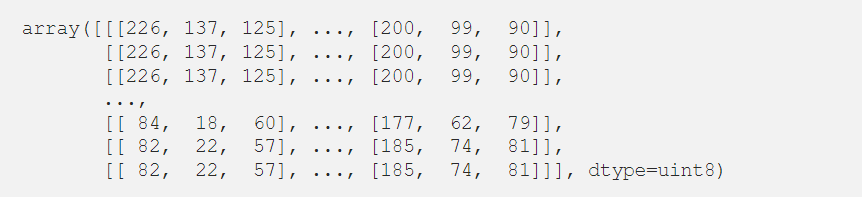

Whatever operation we compute on the grayscale image, we will need to compute the same on the RGB image but for 3 times separating R, G, and B pixels and finally merging them as a proper RGB image.

**Code**

Import the packages

In [1]:
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt

Read the Image

In [2]:
def read_this(image_file,gray_scale=False):
  image_src = cv2.imread(image_file)
  if gray_scale:
    image_src = cv2.cvtColor(image_src,cv2.COLOR_BGR2GRAY)
  else: 
    image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
  return image_src

The above function reads the image either in grayscale or RGB and returns the image matrix.

For converting the image into a ***binary*** image, we can simply make use of the threshold() method available in the cv2 library. This method, irrespective of what the image is (grayscale or RGB) converts into binary. It takes 4 arguments in use.

*   **src** → It is basically the image matrix.
*   **thresh** → It is the threshold value based on which pixels are given a new value. If the pixels are less than this value, we will revalue those pixels to 255. Otherwise, the pixels will be revalued to 0.
*   **maxval** → It is the maximum pixel value that a typical image could contain (255).
*   **type** → It is basically a thresholding type that is given and based on that type the operation is computed. There are several types with which the operation is taken care of.




After this, we will plot the results to see the variation and hence the below function.

In [6]:
def binarize_lib(image_file, thresh_val=127, with_plot=False, gray_scale=False):
  image_src= read_this(image_file=image_file,gray_scale=gray_scale)
  th, image_b = cv2.threshold(src=image_src, thresh=thresh_val, maxval=255,
                             type=cv2.THRESH_BINARY)
  if with_plot:
    cmap_val = None if not gray_scale else 'gray'
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        
    ax1.axis("off")
    ax1.title.set_text('Original')
        
    ax2.axis("off")
    ax2.title.set_text("Binarized")
        
    ax1.imshow(image_src, cmap=cmap_val)
    ax2.imshow(image_b, cmap=cmap_val)
    return True
  return image_b

True

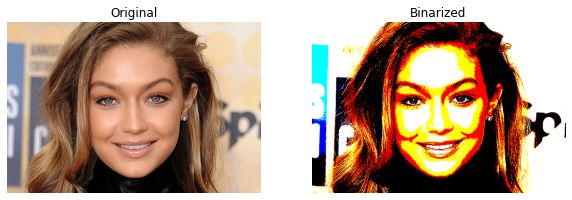

In [7]:
binarize_lib(image_file='/content/gigihadid.jpg', with_plot=True)

True

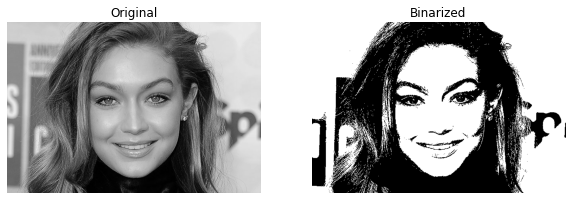

In [8]:
binarize_lib(image_file='/content/gigihadid.jpg', with_plot=True, gray_scale=True)

**Code Implementation from Scratch**

First, we will write a function that will revalue the pixel values which are less than the specified threshold to 255.

By doing it, we will see something like below —

In [9]:
def convert_binary(image_matrix, thresh_val):
  white=255
  black=0

  initial_conv= np.where((image_matrix<= thresh_val),image_matrix,white)
  final_conv = np.where((initial_conv>thresh_val),initial_conv,black)

  return final_conv

We will call the above function three times by separating R, G, and B values and finally merge the same to obtain the binarized image. Once doing it, we can plot the results just like how we did it before.

In [10]:
def binarize_this(image_file, thresh_val=127, with_plot=False, gray_scale=False):
    image_src = read_this(image_file=image_file, gray_scale=gray_scale)
    
    if not gray_scale:
        cmap_val = None
        r_img, g_img, b_img = image_src[:, :, 0], image_src[:, :, 1], image_src[:, :, 2]
        
        r_b = convert_binary(image_matrix=r_img, thresh_val=thresh_val)
        g_b = convert_binary(image_matrix=g_img, thresh_val=thresh_val)
        b_b = convert_binary(image_matrix=b_img, thresh_val=thresh_val)
        
        image_b = np.dstack(tup=(r_b, g_b, b_b))
    else:
        cmap_val = 'gray'
        image_b = convert_binary(image_matrix=image_src, thresh_val=thresh_val)
    
    if with_plot:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        
        ax1.axis("off")
        ax1.title.set_text('Original')
        
        ax2.axis("off")
        ax2.title.set_text("Binarized")
        
        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_b, cmap=cmap_val)
        return True
    return image_b

True

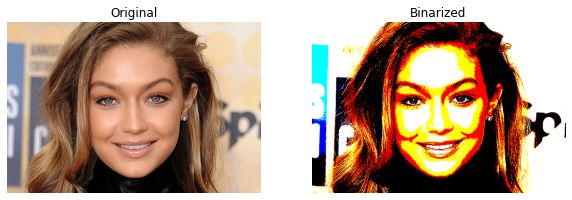

In [11]:
binarize_this(image_file='/content/gigihadid.jpg', with_plot=True)

True

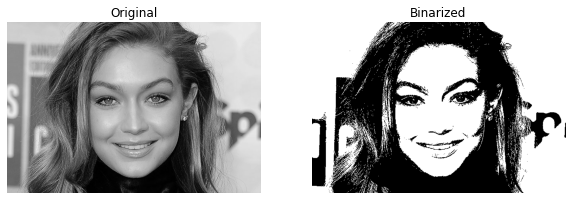

In [12]:
binarize_this(image_file='/content/gigihadid.jpg', with_plot=True, gray_scale=True)